# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key
from dotenv import load_dotenv
import os

load_dotenv()
weather_api_key = os.getenv("OPEN_WEATHERMAP_API_KEY")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [80]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    city_url = url + "q=" + city + "&appid=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #convert from Kelvin to Farhenheit
        city_max_temp = round (((city_max_temp - 273.15) * 9/5 + 32),2)

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | uribia
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | otjiwarongo
Processing Record 6 of Set 1 | cadale
Processing Record 7 of Set 1 | misratah
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | vorkuta
Processing Record 10 of Set 1 | barrouallie
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | nuku'alofa
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | san jose village
City not found. Skipping...
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | lai chau
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | anibare
City not found. Skipping...
Processing Record 21 of Set 1 |

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,48.34,64,1,8.38,RU,1722876385
1,uribia,11.7139,-72.2660,94.08,44,85,8.17,CO,1722876974
2,tazovsky,67.4667,78.7000,48.61,65,96,5.97,RU,1722876457
3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,87,64,13.18,SH,1722876976
4,otjiwarongo,-20.4637,16.6477,67.73,20,0,0.69,NA,1722876977


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,48.34,64,1,8.38,RU,1722876385
1,uribia,11.7139,-72.2660,94.08,44,85,8.17,CO,1722876974
2,tazovsky,67.4667,78.7000,48.61,65,96,5.97,RU,1722876457
3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,87,64,13.18,SH,1722876976
4,otjiwarongo,-20.4637,16.6477,67.73,20,0,0.69,NaN,1722876977


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

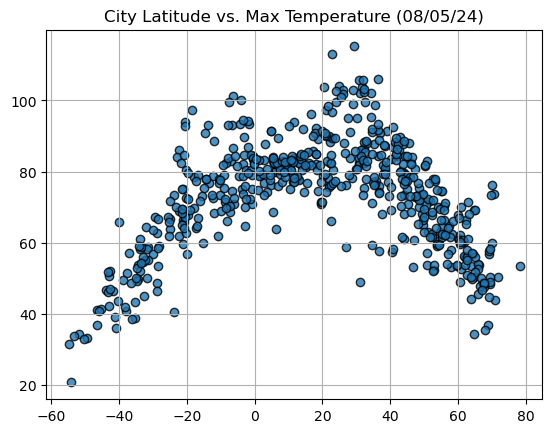

In [85]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

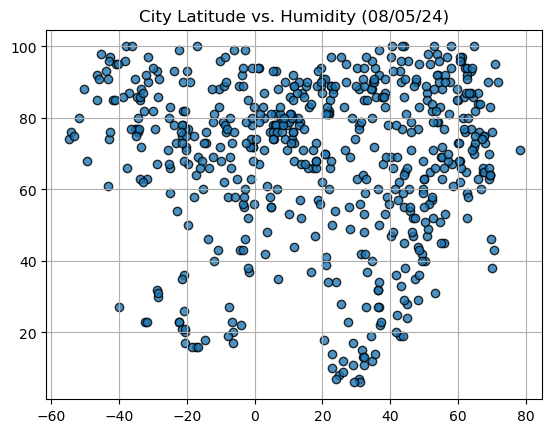

In [86]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

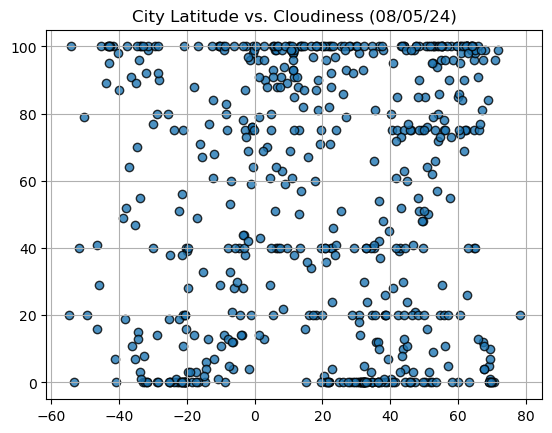

In [87]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

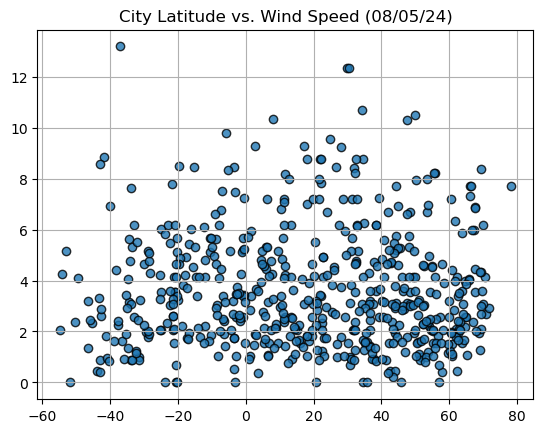

In [88]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.show()

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,48.34,64,1,8.38,RU,1722876385
1,uribia,11.7139,-72.2660,94.08,44,85,8.17,CO,1722876974
2,tazovsky,67.4667,78.7000,48.61,65,96,5.97,RU,1722876457
5,cadale,2.7603,46.3222,76.93,80,13,9.27,SO,1722876978
6,misratah,32.3754,15.0925,86.72,53,0,4.76,LY,1722876979


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,87,64,13.18,SH,1722876976
4,otjiwarongo,-20.4637,16.6477,67.73,20,0,0.69,NaN,1722876977
7,blackmans bay,-43.0167,147.3167,50.74,74,95,0.89,AU,1722876980
10,ushuaia,-54.8000,-68.3000,31.62,74,20,2.06,AR,1722876906
11,nuku'alofa,-21.1333,-175.2000,66.54,82,20,1.54,TO,1722876984


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.6498406787455443


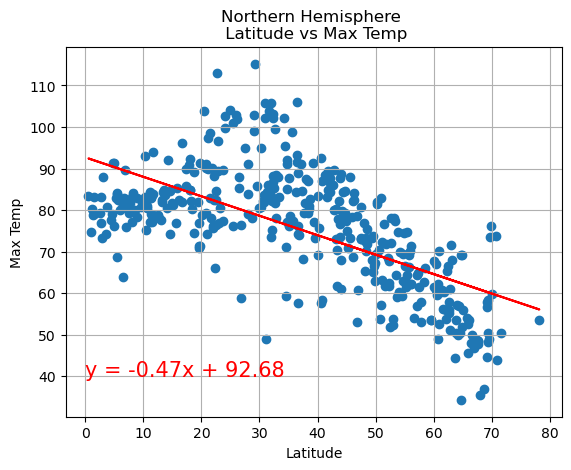

In [94]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Max Temp", "Northern Hemisphere \n Latitude vs Max Temp", (0,40))


The r-value is:  0.8428825034612686


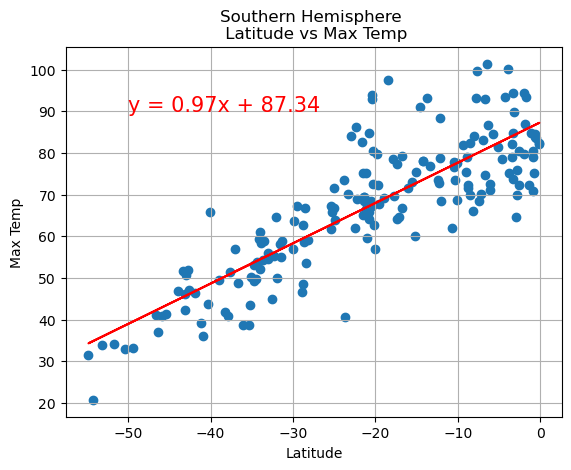

In [96]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Max Temp", "Southern Hemisphere \n Latitude vs Max Temp", (-50,90))

**Discussion about the linear relationship:** 
The closer the Latitude gets towards the equator (0) the higher the temp will be, while the further you get from the equator it colder it will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.03019858458973099


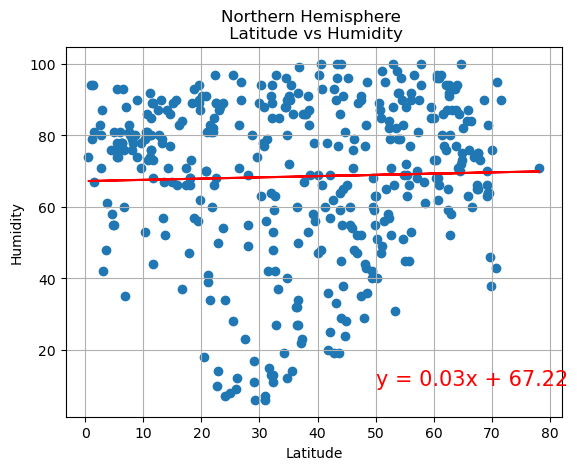

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Humidity", "Northern Hemisphere \n Latitude vs Humidity",(50,10))

The r-value is:  -0.2407059754615888


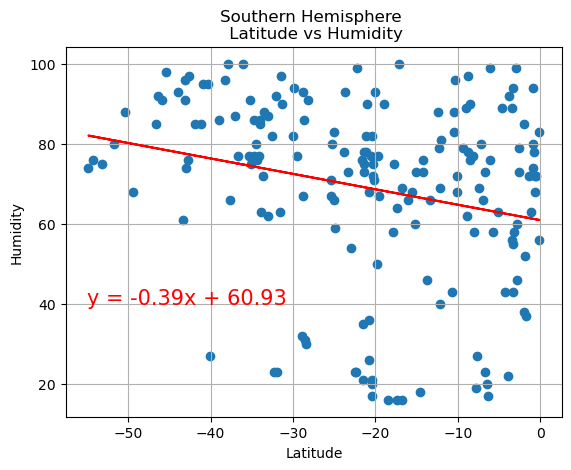

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Humidity", "Southern Hemisphere \n Latitude vs Humidity",(-55,40))

**Discussion about the linear relationship:** The humidity in the northern hemisphere stays close to 70 no matter on the latitude while the southern hemisphere has a slight dip as it the latitude reaches 0. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  -0.0783631748753624


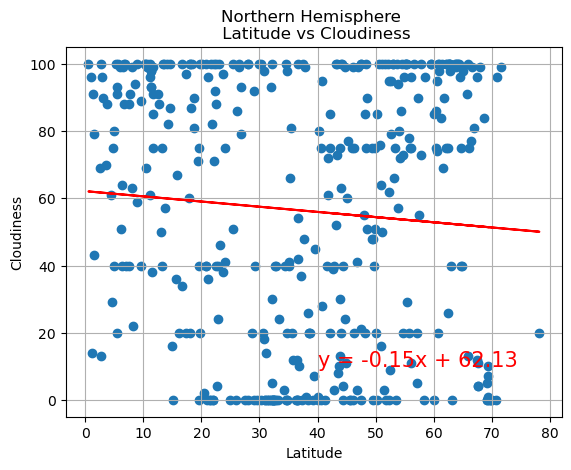

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Cloudiness", "Northern Hemisphere \n Latitude vs Cloudiness", (40,10))

The r-value is:  -0.023445178355859103


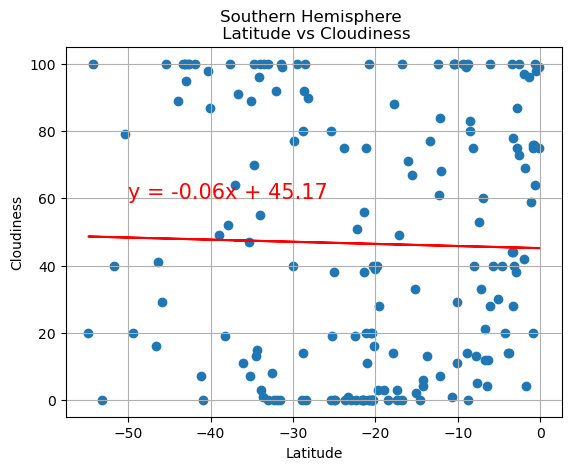

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Cloudiness", "Southern Hemisphere \n Latitude vs Cloudiness", (-50,60))


**Discussion about the linear relationship:** The cloudiness is pretty even acorss both hemisphere the latitude does not really matter. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.050396556410228256


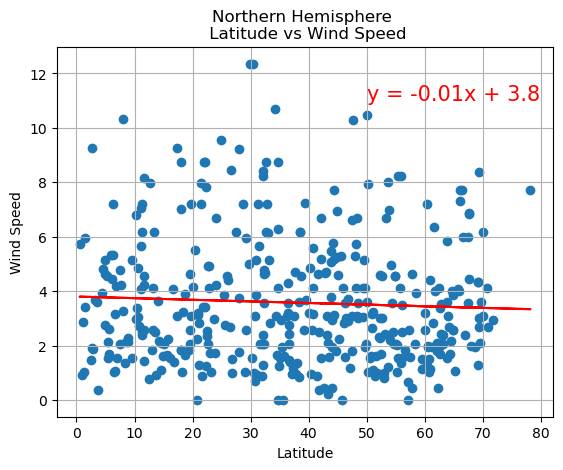

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Wind Speed", "Northern Hemisphere \n Latitude vs Wind Speed", (50,11))

The r-value is:  0.13231257810860592


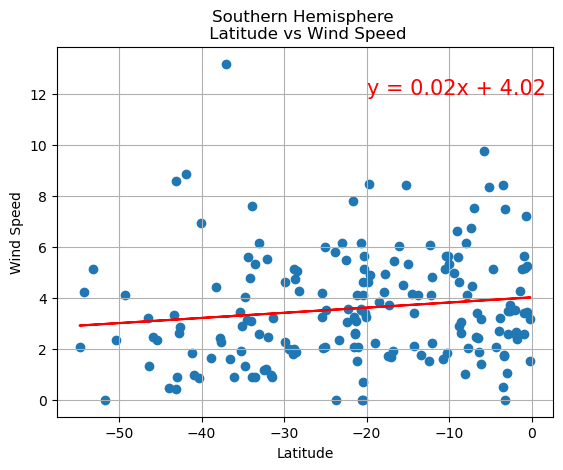

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
print("The r-value is: ", linregress(x_values, y_values).rvalue)
plot_linear_regression(x_values, y_values, "Wind Speed", "Southern Hemisphere \n Latitude vs Wind Speed",(-20,12))

**Discussion about the linear relationship:** The wind speed in both hemispheres is more common between 0 and 6 seeming like the hemisphere and latitude does not quite matter. 